In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# モンテカルロ法
N_monte_list = np.arange(1000, 500000+1, 1000)

sampling_rate_list = []

for N_monte in N_monte_list:
    x = np.random.rand(N_monte)
    y = np.random.rand(N_monte)
    
    sampling_rate = np.sum((x**2+y**2)<1) / N_monte
    sampling_rate_list.append(sampling_rate)

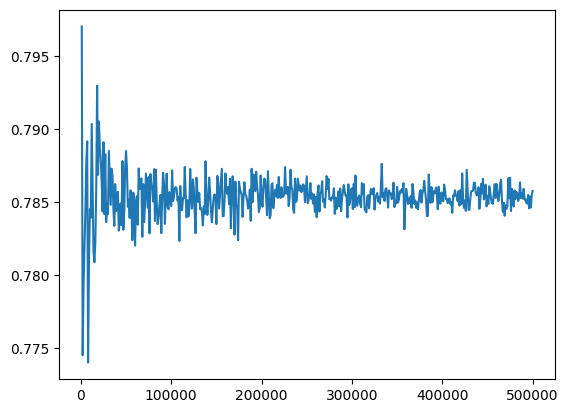

In [3]:
plt.plot(N_monte_list, sampling_rate_list)

In [4]:
# 棄却サンプリング
from scipy.stats import beta, uniform
from scipy import optimize

In [5]:
plt.style.use('ggplot')
np.random.seed(999)

In [6]:
a, b = 1.5, 2

x = np.linspace(beta.ppf(0.001, a, b), beta.ppf(0.999, a, b), 1000)
p = beta(a, b).pdf
res = optimize.fmin(lambda x:-p(x),0.3)
y_max = p(res)  

Optimization terminated successfully.
         Current function value: -1.443376
         Iterations: 10
         Function evaluations: 20


In [9]:
NMSC = 50000
x_mcs = uniform.rvs(size=NMSC)
r = uniform.rvs(size=NMSC)*y_max

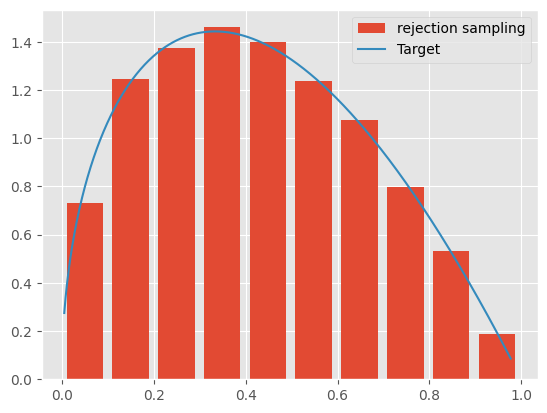

In [10]:
accept = x_mcs[r<=p(x_mcs)]

plt.hist(accept, density=True, rwidth=0.8, label='rejection sampling')
plt.plot(x, beta.pdf(x, a, b), label="Target")
plt.legend()
plt.show()